
**What this notebook covers**
1. Imports and display settings  
2. Load the CSV  
3. Structural overview (types, summary stats, missing values, duplicates)  
4. Light cleaning (trim names, drop duplicates, normalize empty values)  
5. Column typing (numeric vs categorical)  
6. Numeric distributions (histograms)  
7. Categorical frequencies (bar charts)  
8. Correlation heatmap (numeric)  
9. Quick scatter plots (numeric pairs)  
10. (Optional) Time series line plot if a date/time column exists  
11. Save the cleaned dataset  


## 1) Imports — Explanation
We import exactly three libraries:
- **pandas** for DataFrame-based data manipulation
- **numpy** for numerical utilities
- **matplotlib** for plotting charts

We also configure figure size and DataFrame display options to keep outputs readable.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 5)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)


## 2) Load Dataset — Explanation
- `csv_path` contains the location of your uploaded CSV file.
- We read it into `df` using `pd.read_csv`.
- `head()` previews the first five rows to confirm that loading worked as expected.


In [4]:

csv_path = r"/content/city_hour.csv"
df = pd.read_csv(csv_path)
df.head()


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01 00:00:00,258.0,340.6,191.0,13.4,104.1,16.2,1.15,39.8,70.4,11.64,10.23,1.95,411.5,Moderate
1,Mumbai,2015-01-01 00:00:00,120.1,47.9,165.3,57.9,139.2,14.4,0.76,3.3,23.2,11.35,11.38,1.53,134.8,Poor
2,Chennai,2015-01-01 00:00:00,130.1,375.0,21.9,23.7,205.6,33.6,3.50,63.0,138.9,16.30,24.07,0.56,329.6,Poor
3,Kolkata,2015-01-01 00:00:00,189.1,174.3,139.7,58.9,103.7,19.2,0.81,3.3,14.6,5.12,1.42,2.35,351.9,Good
4,Bangalore,2015-01-01 00:00:00,357.8,48.8,121.2,83.3,8.3,11.9,6.31,67.4,195.9,15.12,16.80,8.95,23.7,Moderate


## 3) Dataset Overview — Explanation
This step builds a quick understanding of the dataset:
- `df.info()` shows column names, non-null counts, and data types.
- `df.describe()` summarizes numeric columns (mean, std, quartiles, etc.).
- `df.isna().sum()` counts missing values per column, which guides the cleaning stage.
- We also check the number of fully duplicated rows (exact duplicates).


In [5]:

df_info = df.info()
display(df.describe())   # numeric columns summary
display(df.isna().sum().sort_values(ascending=False).to_frame("missing_count"))
print("Duplicate rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149025 entries, 0 to 149024
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        149025 non-null  object 
 1   Datetime    149025 non-null  object 
 2   PM2.5       149024 non-null  float64
 3   PM10        149024 non-null  float64
 4   NO          149024 non-null  float64
 5   NO2         149024 non-null  float64
 6   NOx         149024 non-null  float64
 7   NH3         149024 non-null  float64
 8   CO          149024 non-null  float64
 9   SO2         149024 non-null  float64
 10  O3          149024 non-null  float64
 11  Benzene     149024 non-null  float64
 12  Toluene     149024 non-null  float64
 13  Xylene      149024 non-null  float64
 14  AQI         149024 non-null  float64
 15  AQI_Bucket  149024 non-null  object 
dtypes: float64(13), object(3)
memory usage: 18.2+ MB


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,149024.000000,149024.000000,149024.000000,149024.000000,149024.000000,149024.000000,149024.000000,149024.000000,149024.000000,149024.000000,149024.000000,149024.000000,149024.000000
mean,249.113763,299.508687,100.145171,75.128469,125.232530,25.037026,4.997004,50.204466,100.034972,10.013925,15.018352,5.005532,250.233054
std,144.287296,173.244669,57.707699,43.285598,72.146575,14.429339,2.886298,28.886074,57.734229,5.769425,8.672376,2.889838,144.254441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.300000,148.975000,50.100000,37.600000,62.700000,12.500000,2.500000,25.200000,50.100000,5.010000,7.480000,2.510000,125.200000
50%,248.900000,298.700000,100.200000,75.100000,125.800000,25.000000,4.990000,50.200000,100.000000,10.020000,15.030000,5.010000,249.900000
75%,373.800000,449.800000,150.300000,112.600000,187.700000,37.600000,7.490000,75.300000,150.000000,15.020000,22.510000,7.510000,375.500000
max,500.000000,600.000000,200.000000,150.000000,250.000000,50.000000,10.000000,100.000000,200.000000,20.000000,30.000000,10.000000,500.000000


,missing_count
PM10,1
PM2.5,1
NO2,1
NO,1
NOx,1
NH3,1
SO2,1
CO,1
Toluene,1
Xylene,1


Duplicate rows: 0


## 4) Light Cleaning — Explanation
We apply safe, generic cleanup steps:
- **Trim column names** to remove accidental leading/trailing spaces.
- **Drop exact duplicate rows** to reduce redundancy.
- **Normalize empty strings to `NaN`** so missing values are handled consistently.

> You can extend this later with domain-specific rules (e.g., type casting, range checks, or custom imputations).


In [6]:

# 4.1 Trim column names
df.columns = [c.strip() for c in df.columns]

# 4.2 Drop exact duplicates
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Dropped {before - after} duplicate rows. New shape:", df.shape)

# 4.3 Convert empty strings to NaN for object columns
obj_cols = df.select_dtypes(include='object').columns
for c in obj_cols:
    df[c] = df[c].replace("", np.nan)
    df[c] = df[c].apply(lambda x: (np.nan if isinstance(x, str) and x.strip()=="" else x))

df.head()


Dropped 0 duplicate rows. New shape: (149025, 16)


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01 00:00:00,258.0,340.6,191.0,13.4,104.1,16.2,1.15,39.8,70.4,11.64,10.23,1.95,411.5,Moderate
1,Mumbai,2015-01-01 00:00:00,120.1,47.9,165.3,57.9,139.2,14.4,0.76,3.3,23.2,11.35,11.38,1.53,134.8,Poor
2,Chennai,2015-01-01 00:00:00,130.1,375.0,21.9,23.7,205.6,33.6,3.50,63.0,138.9,16.30,24.07,0.56,329.6,Poor
3,Kolkata,2015-01-01 00:00:00,189.1,174.3,139.7,58.9,103.7,19.2,0.81,3.3,14.6,5.12,1.42,2.35,351.9,Good
4,Bangalore,2015-01-01 00:00:00,357.8,48.8,121.2,83.3,8.3,11.9,6.31,67.4,195.9,15.12,16.80,8.95,23.7,Moderate


## 5) Identify Numeric & Categorical Columns — Explanation
We split columns into two groups:
- **Numeric**: good for statistics, histograms, correlations, scatter plots.
- **Categorical**: good for frequency tables and bar charts.

The resulting lists help target appropriate analysis methods for each column type.


In [7]:

num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Numeric columns: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
Categorical columns: ['City', 'Datetime', 'AQI_Bucket']


## 6) Numeric Distributions (Histograms) — Explanation
Histograms reveal distribution shapes, spread, skewness, and potential outliers:
- We plot up to the first **10** numeric columns to keep rendering manageable on wide datasets.
- Use this to spot issues like heavy skew or multimodal distributions.


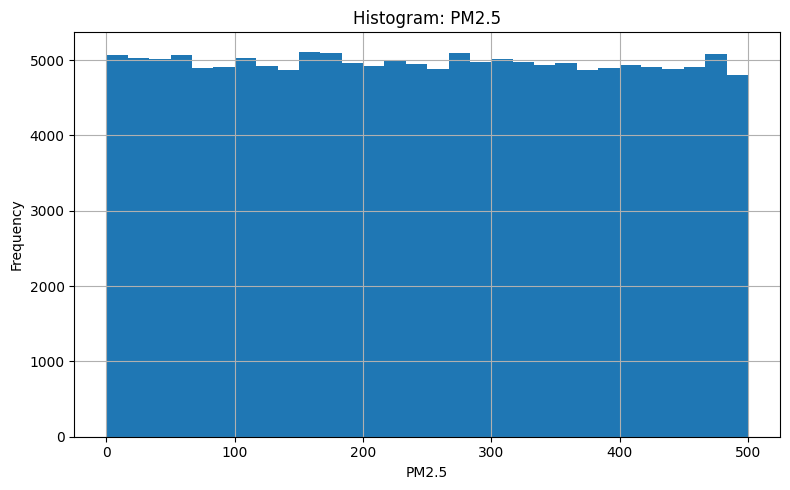

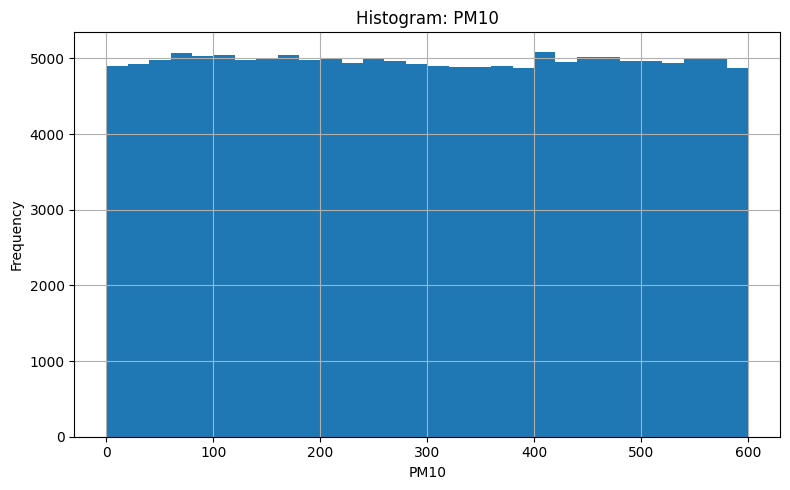

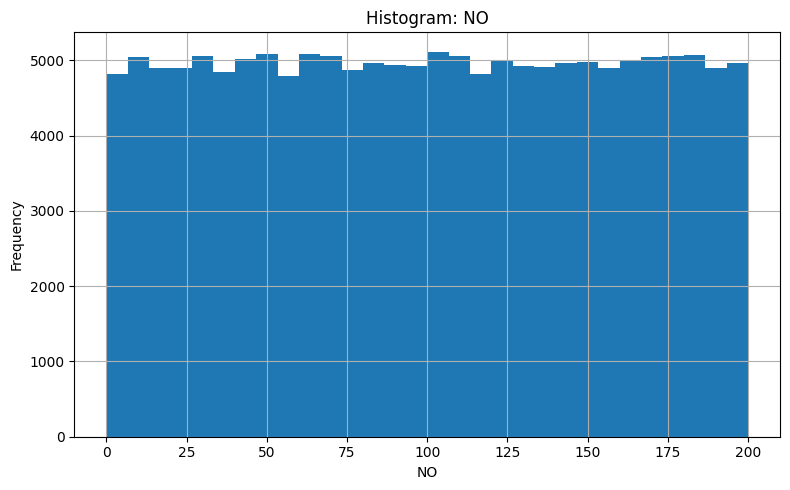

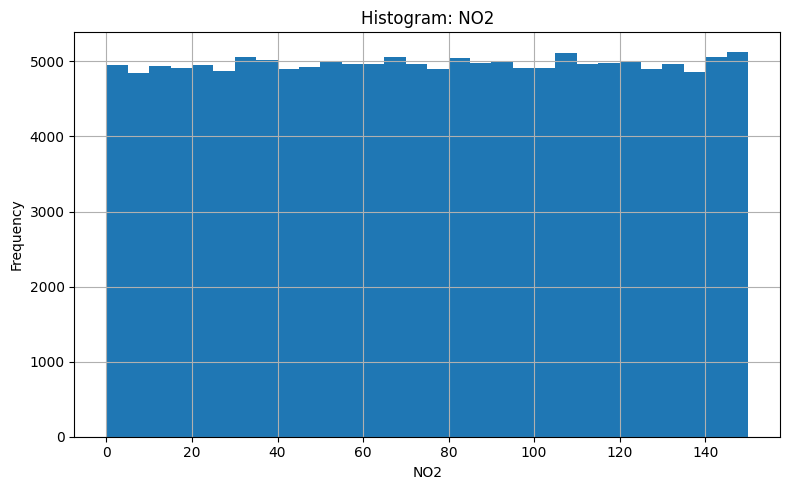

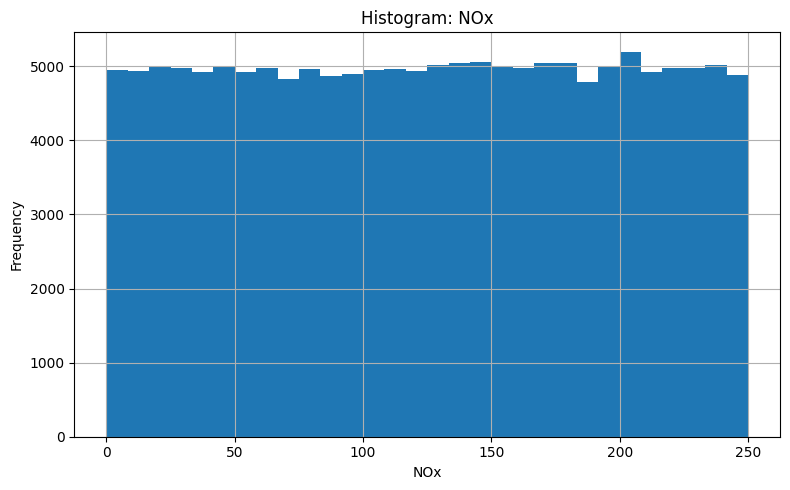

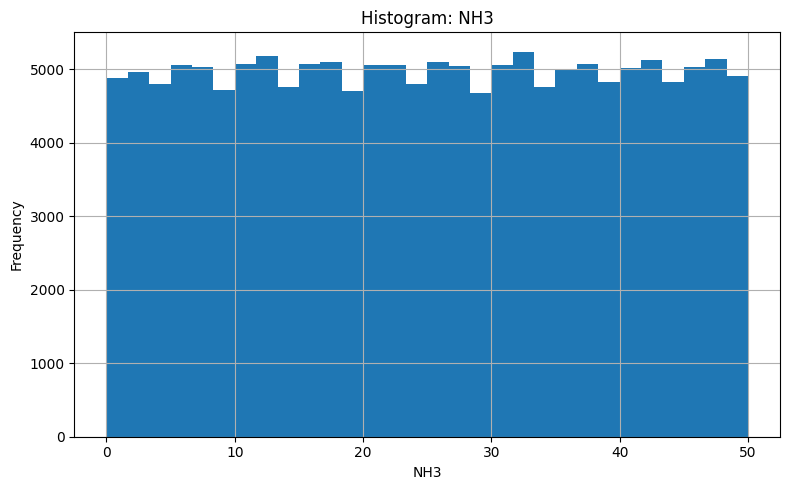

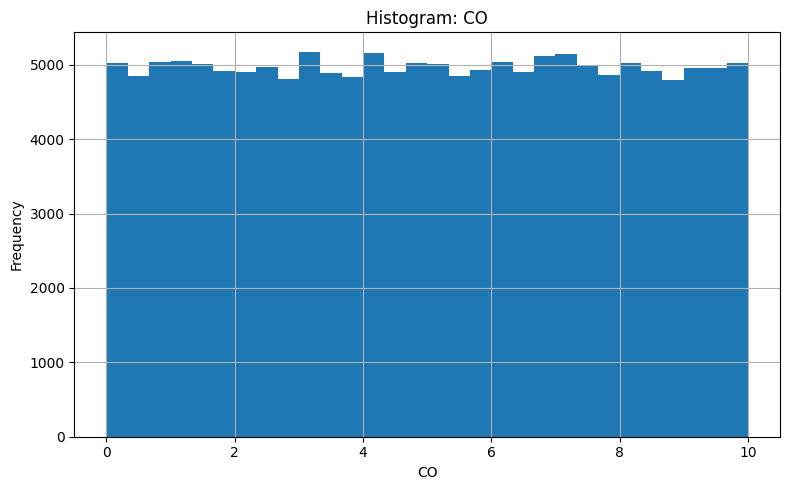

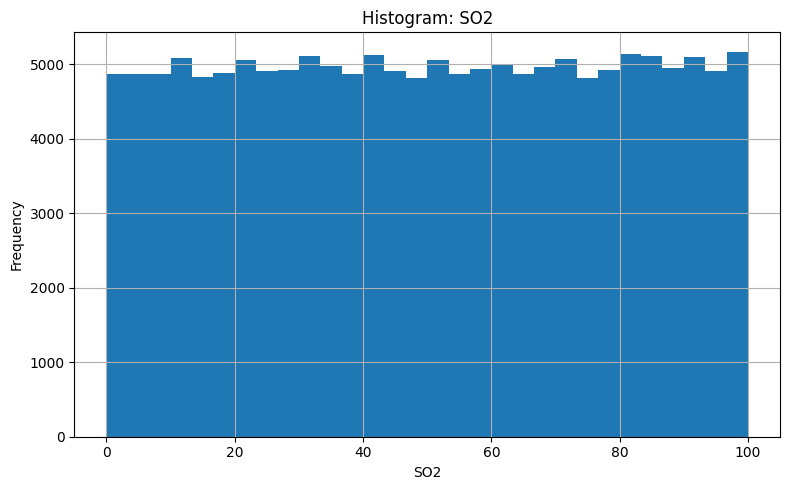

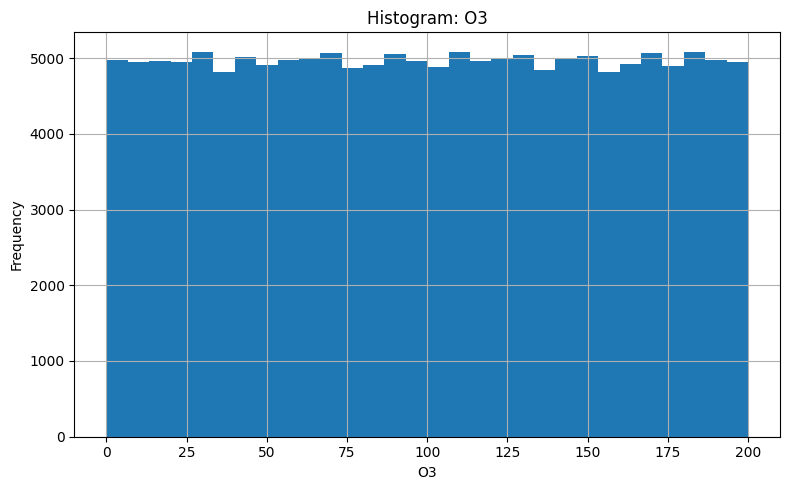

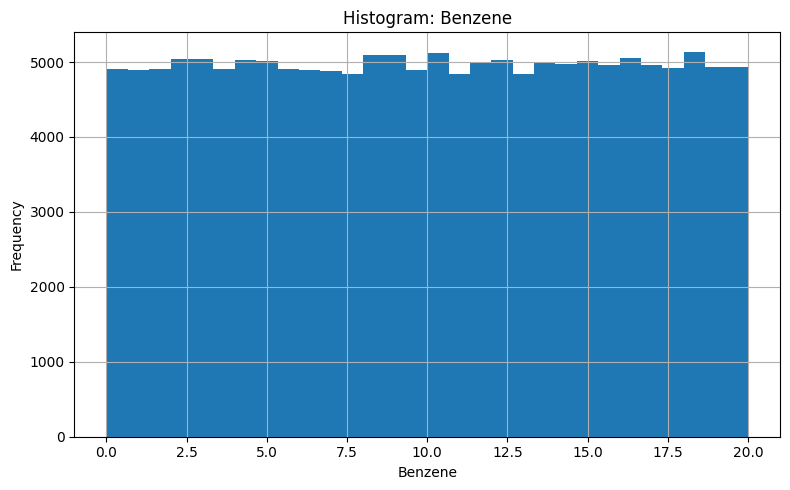

In [8]:

if num_cols:
    for c in num_cols[:10]:
        plt.figure()
        df[c].dropna().hist(bins=30)
        plt.title(f'Histogram: {c}')
        plt.xlabel(c); plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
else:
    print("No numeric columns to plot.")


## 7) Categorical Frequencies (Bar Charts) — Explanation
For categorical columns, value counts highlight dominant categories and class balance:
- We show the **top 10** categories for up to the first **5** categorical columns.
- Use this to detect rare labels, category imbalance, or data-entry anomalies.


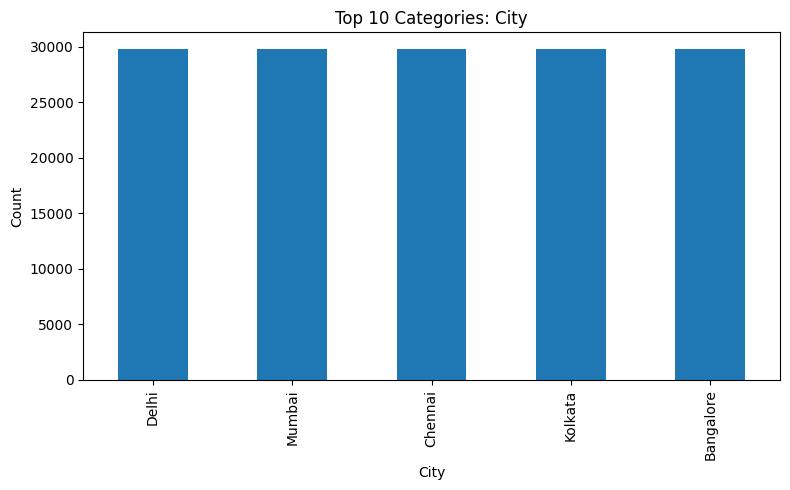

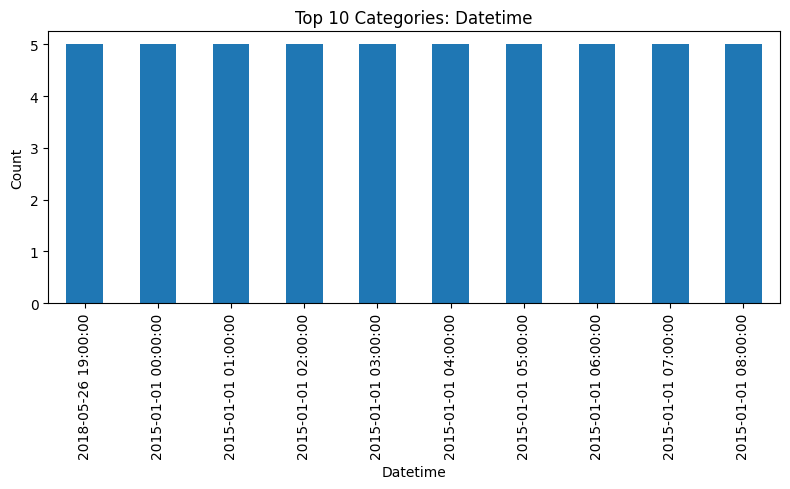

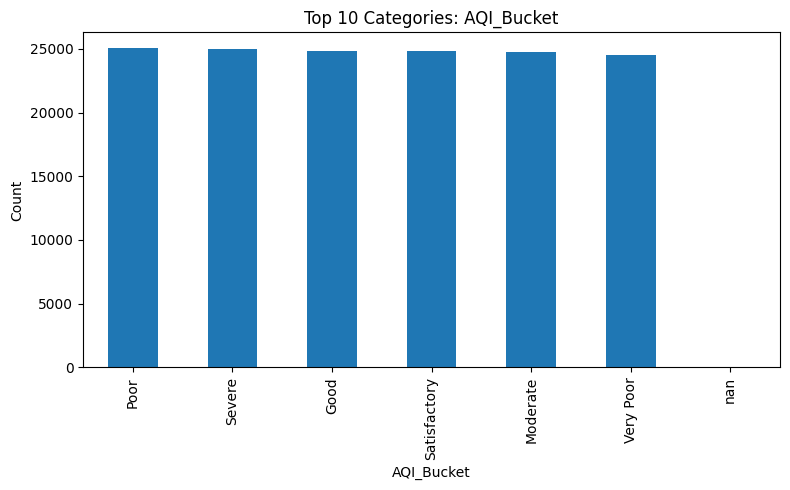

In [9]:

if cat_cols:
    for c in cat_cols[:5]:
        plt.figure()
        df[c].value_counts(dropna=False).head(10).plot(kind='bar')
        plt.title(f'Top 10 Categories: {c}')
        plt.xlabel(c); plt.ylabel('Count')
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns to plot.")


## 8) Correlation Heatmap (Numeric) — Explanation
We compute Pearson correlations among numeric columns and visualize them:
- Values near **+1** indicate strong positive linear relationships.
- Values near **-1** indicate strong negative linear relationships.
- Values around **0** suggest weak or no linear relationships.

This helps identify redundant features or interesting relations to explore further.


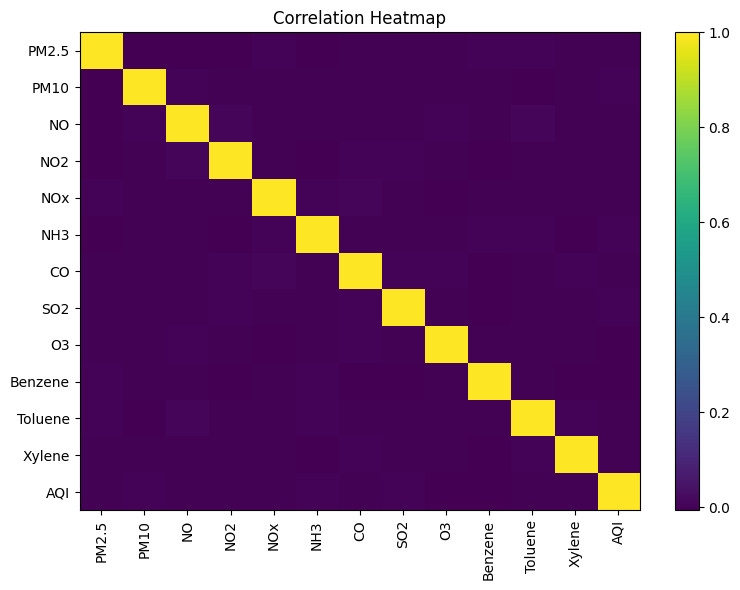

In [10]:

if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    plt.figure(figsize=(8, 6))
    plt.imshow(corr, aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print("Need at least 2 numeric columns for a correlation heatmap.")


## 9) Quick Scatter Plots (Numeric Pairs) — Explanation
Scatter plots visualize relationships between pairs of numeric features:
- Useful for spotting linear/non-linear trends, clusters, or outliers.
- We draw a few adjacent pairs (up to 3) for a fast visual scan.


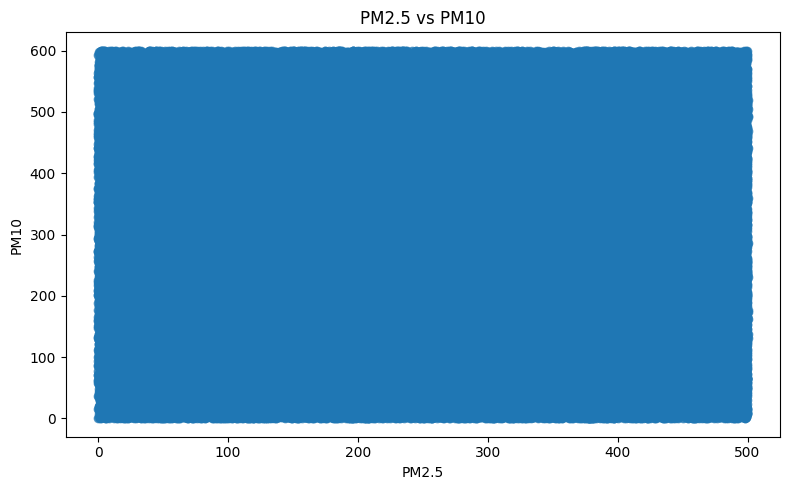

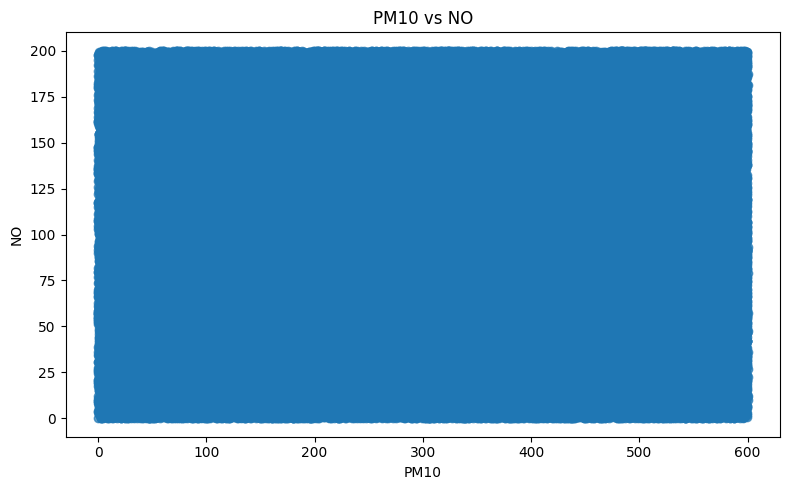

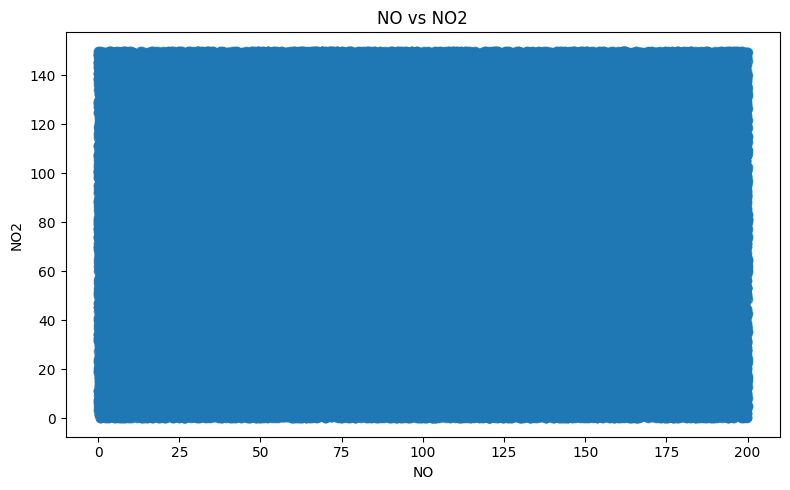

In [11]:

if len(num_cols) >= 2:
    pairs_to_show = min(3, len(num_cols)-1)
    for i in range(pairs_to_show):
        x, y = num_cols[i], num_cols[i+1]
        plt.figure()
        plt.scatter(df[x], df[y], alpha=0.7)
        plt.xlabel(x); plt.ylabel(y)
        plt.title(f'{x} vs {y}')
        plt.tight_layout()
        plt.show()
else:
    print("Not enough numeric columns for scatter plots.")


## 10) Optional Time Series Plot — Explanation
If your dataset includes a date/time column (e.g., names containing `date`, `time`, or `timestamp`) **and** at least one numeric column:
- We try to parse the first such date-like column to `datetime` if it is not already.
- Then we create a simple daily mean line plot for the first numeric column to see overall trends.


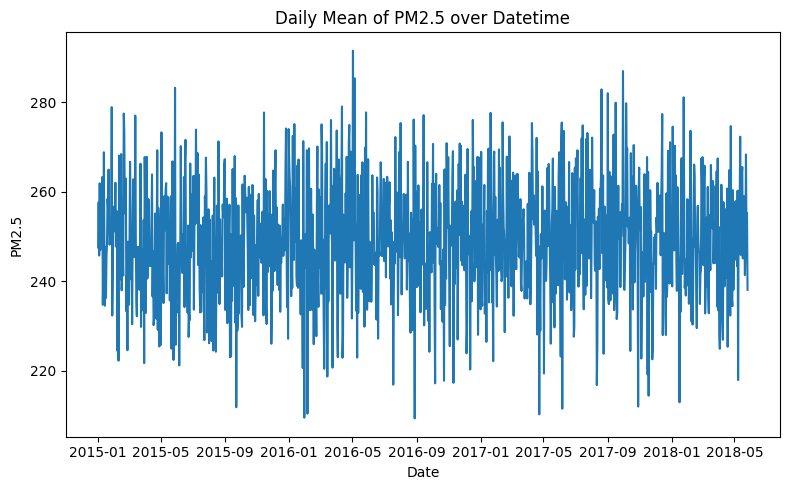

In [12]:

# Try to auto-detect a date/time column by name
date_like = [c for c in df.columns if isinstance(c, str) and any(k in c.lower() for k in ['date','time','timestamp'])]

if date_like and len(num_cols) >= 1:
    dcol = date_like[0]
    # Attempt to convert to datetime if not already
    if not np.issubdtype(df[dcol].dtype, np.datetime64):
        try:
            df[dcol] = pd.to_datetime(df[dcol], errors='coerce')
        except Exception as e:
            print("Datetime conversion failed for", dcol, ":", e)
    if np.issubdtype(df[dcol].dtype, np.datetime64):
        ycol = num_cols[0]
        ts = df[[dcol, ycol]].dropna()
        if not ts.empty:
            ts = ts.sort_values(dcol).set_index(dcol)
            daily = ts.resample('D').mean()
            plt.figure()
            plt.plot(daily.index, daily[ycol])
            plt.title(f'Daily Mean of {ycol} over {dcol}')
            plt.xlabel('Date'); plt.ylabel(ycol)
            plt.tight_layout()
            plt.show()
        else:
            print("No data left after dropping NA for the time series slice.")
    else:
        print("Detected a date-like column but could not convert it to datetime.")
else:
    print("No suitable date-like column and numeric column pair found for time series.")


## 11) Save the Cleaned Dataset — Explanation
We export the cleaned DataFrame to a new CSV with the suffix `_cleaned_explained`.  
Use this file for reporting, dashboards, or machine learning pipelines.


In [13]:

clean_path = csv_path.replace('.csv', '_cleaned_explained.csv')
df.to_csv(clean_path, index=False)
print("Saved cleaned CSV to:", clean_path)


Saved cleaned CSV to: /content/city_hour_cleaned_explained.csv
